In [2]:
import pandas as pd
import numpy as np
#from scipy.stats import permutation_test
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dir = '/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/'
#dir = '/home/brainstimmaps/RESEARCH/20xx_Projects/2021_HDP/perm_test/'

def statistic(x,y):
  # Calculation of Mean Squared Error (MSE)
    return mean_squared_error(x,y)

In [4]:
newdata = 'newdata10/'
best_level_clinical_model_HDP = pd.read_csv(dir + newdata + 'best_level_clinical_model_HDP.csv')
#best_level_clinical_model_CST = pd.read_csv(dir + newdata + 'best_level_clinical_model_CST.csv')
best_level_clinical_model_2 = pd.read_csv(dir + newdata + 'best_level_clinical_model_2.csv')

best_contact_clinical_model_HDP = pd.read_csv(dir + newdata + 'best_contact_clinical_model_HDP.csv')
#best_contact_clinical_model_CST = pd.read_csv(dir + newdata + 'best_contact_clinical_model_CST.csv')
best_contact_clinical_model_2 = pd.read_csv(dir + newdata + 'best_contact_clinical_model_2.csv')

In [5]:
best_contact_clinical_model_HDP.best_model.sum()

73.0

In [5]:
best_contact_clinical_model_HDP.groupby(best_contact_clinical_model_HDP['compare']).count()

LeadID  ContactID   mA  best_clin  mA_model  best_model
compare                                                         
False        87         87   87         87        87          87
True        116        116  116        116       116         116

In [6]:
116/203

0.5714285714285714

In [8]:
best_contact_clinical_model_HDP.loc[best_contact_clinical_model_HDP['best_clin'] == 1].groupby(best_contact_clinical_model_HDP['compare']).count()

LeadID  ContactID  mA  best_clin  mA_model  best_model  compare
compare                                                                 
False        29         29  29         29        29          29       29
True         15         15  15         15        15          15       15

In [13]:
best_contact_clinical_model_HDP.loc[(best_contact_clinical_model_HDP['best_clin'] == 1 ) & (best_contact_clinical_model_HDP['best_model'] == 1)].best_clin.sum()

15

In [5]:
# Best level HDP
x = best_level_clinical_model_HDP.best_model.to_numpy()
y = best_level_clinical_model_HDP.best_clin.to_numpy()

In [14]:
# Best contact HDP
x = best_contact_clinical_model_HDP.best_model.to_numpy()
y = best_contact_clinical_model_HDP.best_clin.to_numpy()

In [12]:
# Best level 2
x = best_level_clinical_model_2.best_model.to_numpy()
y = best_level_clinical_model_2.best_clin.to_numpy()

In [4]:
# Best contact 2
x = best_contact_clinical_model_2.best_model.to_numpy()
y = best_contact_clinical_model_2.best_clin.to_numpy()

In [6]:
df = pd.DataFrame({'x':x, 'y':y})
match = df.loc[(df['x'] == 1 ) & (df['y'] == 1)].y.sum()

Model MSE: 30
n permutations < Model MSE = 9972
p-value = 0.0028
Ones in x (best_model): 59.0
Ones in y (best_clin): 52


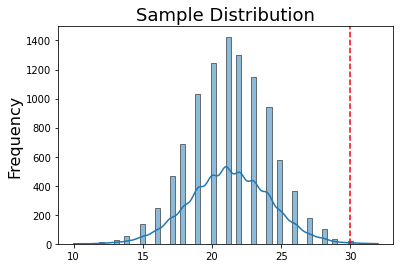

In [7]:
# Permuting x_model and counting only 1s
n_permutations = 10000
permute_mse = []

for p in range(n_permutations):
    x_permuted = np.random.permutation(x)
    df = pd.DataFrame({'x':x_permuted, 'y':y})
    match = df.loc[(df['x'] == 1 ) & (df['y'] == 1)].y.sum()
    permute_mse.append(match)

df_model = pd.DataFrame({'x':x, 'y':y})
model_mse = df_model.loc[(df_model['x'] == 1 ) & (df_model['y'] == 1)].y.sum()

p_value = 1 - np.sum(permute_mse < model_mse)/len(permute_mse) #upper tailed test
#p_value = np.sum(permute_mse < model_mse)/len(permute_mse) #lower tailed test

sns.histplot(permute_mse, kde=True, label='Population')
plt.title('Sample Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(x=model_mse, ymin=0, ymax=1, color='red', linestyle='--')

print(f'Model MSE: {model_mse}')
print(f'n permutations < Model MSE = {np.sum(permute_mse < model_mse)}')
print(f'p-value = {p_value:.3}')
print('Ones in x (best_model):' , x.sum())
print('Ones in y (best_clin):' , y.sum())

Model MSE: 0.646
n permutations < Model MSE = 99788
p-value = 0.00212
Ones in x (best_model): 59.0
Ones in y (best_clin): 52


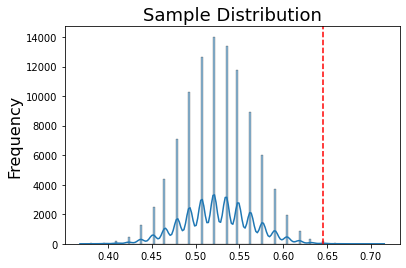

In [8]:
# Permuting x_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
n_permutations = 100000

permute_mse = []
for p in range(n_permutations):
    x_permuted = np.random.permutation(x)
    #mse = mean_squared_error(y,x_permuted)
    mse = accuracy_score(y,x_permuted)

    permute_mse.append(mse)

#model_mse = mean_squared_error(y,x)
model_mse = accuracy_score(y,x)
p_value = 1 - np.sum(permute_mse < model_mse)/len(permute_mse) #upper tailed test
#p_value = np.sum(permute_mse < model_mse)/len(permute_mse) #lower tailed test

sns.histplot(permute_mse, kde=True, label='Population')
plt.title('Sample Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(x=model_mse, ymin=0, ymax=1, color='red', linestyle='--')

print(f'Model MSE: {model_mse:.3}')
print(f'n permutations < Model MSE = {np.sum(permute_mse < model_mse)}')
print(f'p-value = {p_value:.3}')
print('Ones in x (best_model):' , x.sum())
print('Ones in y (best_clin):' , y.sum())

In [20]:
x_permuted.sum()

73.0

ones in x_rand 82
Model MSE: 0.646
n permutations < Model MSE = 99999
p-value = 1e-05


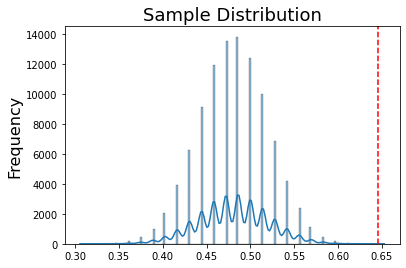

In [9]:
# Permuting x_rand (random nº of 0 / 1 )

x_rand = np.random.randint(2, size=len(x))
print('ones in x_rand', x_rand.sum())

n_permutations = 100000

permute_mse = []
for p in range(n_permutations):
    x_permuted = np.random.permutation(x_rand)
    mse = accuracy_score(y,x_permuted)

    permute_mse.append(mse)

model_mse = accuracy_score(y,x)
p_value = 1 - np.sum(permute_mse < model_mse)/len(permute_mse)

sns.histplot(permute_mse, kde=True, label='Population')
plt.title('Sample Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(x=model_mse, ymin=0, ymax=1, color='red', linestyle='--')

print(f'Model MSE: {model_mse:.3}')
print(f'n permutations < Model MSE = {np.sum(permute_mse < model_mse)}')
print(f'p-value = {p_value:.10}')

Model MSE: 15
n permutations < Model MSE = 99670
p-value = 0.0033


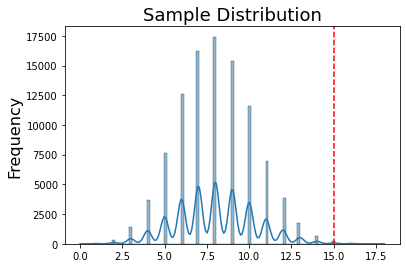

In [40]:
# Permuting x_rand with 37 ones  ## best contact HDP
N = len(x)
K = best_contact_clinical_model_HDP.LeadID.nunique() #37 # K zeros, N-K ones
#K=74 # 2 best contacts per lead
#K=111# 3 best contacts per lead
#K=142 #4 best per lead

x_rand = np.array([1] * K + [0] * (N-K))
np.random.shuffle(x_rand)

n_permutations = 100000
permute_mse = []

for p in range(n_permutations):
    x_permuted = np.random.permutation(x_rand)
    #mse = accuracy_score(y,x_permuted)
    #permute_mse.append(mse)
    df = pd.DataFrame({'x':x_permuted, 'y':y})
    match = df.loc[(df['x'] == 1 ) & (df['y'] == 1)].y.sum()
    permute_mse.append(match)

#model_mse = accuracy_score(y,x)
df_model = pd.DataFrame({'x':x, 'y':y})
model_mse = df_model.loc[(df_model['x'] == 1 ) & (df_model['y'] == 1)].y.sum()

p_value = 1 - np.sum(permute_mse < model_mse)/len(permute_mse)
#p_value = np.sum(permute_mse < model_mse)/len(permute_mse)

sns.histplot(permute_mse, kde=True, label='Population')
plt.title('Sample Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(x=model_mse, ymin=0, ymax=1, color='red', linestyle='--')

print(f'Model MSE: {model_mse}')
print(f'n permutations < Model MSE = {np.sum(permute_mse < model_mse)}')
print(f'p-value = {p_value:.3}')

Model MSE: 31
n permutations < Model MSE = 100000
p-value = 0.0


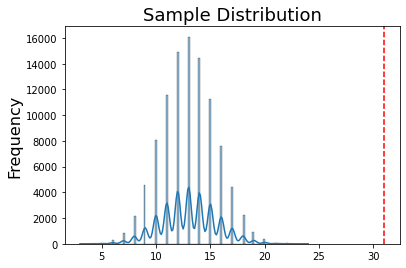

In [42]:
# Permuting x_rand with 37 ones  ## best level HDP

# Best level HDP
x = best_level_clinical_model_HDP.best_model.to_numpy()
y = best_level_clinical_model_HDP.best_clin.to_numpy()

N = len(x)
K = best_level_clinical_model_HDP.LeadID.nunique() #37 # K zeros, N-K ones
#K=74 # 2 best contacts per lead
#K=111# 3 best contacts per lead
#K=142 #4 best per lead

x_rand = np.array([1] * K + [0] * (N-K))
np.random.shuffle(x_rand)

n_permutations = 100000
permute_mse = []

for p in range(n_permutations):
    x_permuted = np.random.permutation(x_rand)
    #mse = accuracy_score(y,x_permuted)
    #permute_mse.append(mse)
    df = pd.DataFrame({'x':x_permuted, 'y':y})
    match = df.loc[(df['x'] == 1 ) & (df['y'] == 1)].y.sum()
    permute_mse.append(match)

#model_mse = accuracy_score(y,x)
df_model = pd.DataFrame({'x':x, 'y':y})
model_mse = df_model.loc[(df_model['x'] == 1 ) & (df_model['y'] == 1)].y.sum()

p_value = 1 - np.sum(permute_mse < model_mse)/len(permute_mse)
#p_value = np.sum(permute_mse < model_mse)/len(permute_mse)

sns.histplot(permute_mse, kde=True, label='Population')
plt.title('Sample Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(x=model_mse, ymin=0, ymax=1, color='red', linestyle='--')

print(f'Model MSE: {model_mse}')
print(f'n permutations < Model MSE = {np.sum(permute_mse < model_mse)}')
print(f'p-value = {p_value:.3}')

Model MSE: 13
n permutations < Model MSE = 97198
p-value = 0.028


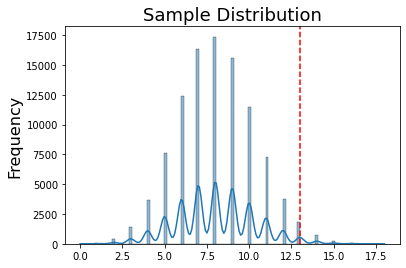

In [43]:
# Permuting x_rand with 37 ones  ## best contact both
# Best contact 2
x = best_contact_clinical_model_2.best_model.to_numpy()
y = best_contact_clinical_model_2.best_clin.to_numpy()

N = len(x)
K = best_contact_clinical_model_2.LeadID.nunique() #37 # K zeros, N-K ones
#K=74 # 2 best contacts per lead
#K=111# 3 best contacts per lead
#K=142 #4 best per lead

x_rand = np.array([1] * K + [0] * (N-K))
np.random.shuffle(x_rand)

n_permutations = 100000
permute_mse = []

for p in range(n_permutations):
    x_permuted = np.random.permutation(x_rand)
    #mse = accuracy_score(y,x_permuted)
    #permute_mse.append(mse)
    df = pd.DataFrame({'x':x_permuted, 'y':y})
    match = df.loc[(df['x'] == 1 ) & (df['y'] == 1)].y.sum()
    permute_mse.append(match)

#model_mse = accuracy_score(y,x)
df_model = pd.DataFrame({'x':x, 'y':y})
model_mse = df_model.loc[(df_model['x'] == 1 ) & (df_model['y'] == 1)].y.sum()

p_value = 1 - np.sum(permute_mse < model_mse)/len(permute_mse)
#p_value = np.sum(permute_mse < model_mse)/len(permute_mse)

sns.histplot(permute_mse, kde=True, label='Population')
plt.title('Sample Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(x=model_mse, ymin=0, ymax=1, color='red', linestyle='--')

print(f'Model MSE: {model_mse}')
print(f'n permutations < Model MSE = {np.sum(permute_mse < model_mse)}')
print(f'p-value = {p_value:.3}')

In [ ]:
### TODO
#permute with vector with 37 ones 38.... up to 2 best per lead

Model MSE: 0.571
n permutations < Model MSE = 125628
p-value = 0.243


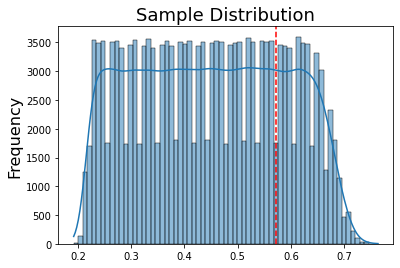

In [27]:
N = len(x)
K = best_contact_clinical_model_HDP.LeadID.nunique() #37 # K zeros, N-K ones

permute_mse = []

for K in np.arange(37,203,1):
#for K in np.arange(37,296,1):
    x_rand = np.array([1] * K + [0] * (N-K))
    np.random.shuffle(x_rand)

    n_permutations = 1000

    for p in range(n_permutations):
        x_permuted = np.random.permutation(x_rand)
        mse = accuracy_score(y,x_permuted)

        permute_mse.append(mse)

model_mse = accuracy_score(y,x)
p_value = 1 - np.sum(permute_mse < model_mse)/len(permute_mse)
#p_value = np.sum(permute_mse < model_mse)/len(permute_mse)

sns.histplot(permute_mse, kde=True, label='Population')
plt.title('Sample Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(x=model_mse, ymin=0, ymax=1, color='red', linestyle='--')

print(f'Model MSE: {model_mse:.3}')
print(f'n permutations < Model MSE = {np.sum(permute_mse < model_mse)}')
print(f'p-value = {p_value:.3}')

Model MSE: 15
n permutations < Model MSE = 31047
p-value = 0.813
Ones in x (best_model): 73.0
Ones in y (best_clin): 44


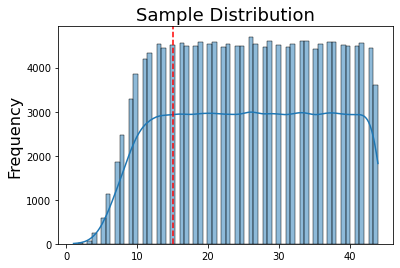

In [29]:
N = len(x)
K = best_contact_clinical_model_HDP.LeadID.nunique() #37 # K zeros, N-K ones
permute_mse = []

for K in np.arange(37,203,1):

    x_rand = np.array([1] * K + [0] * (N-K))
    np.random.shuffle(x_rand)

    n_permutations = 1000

    for p in range(n_permutations):
        x_permuted = np.random.permutation(x_rand)
        df = pd.DataFrame({'x':x_permuted, 'y':y})
        match = df.loc[(df['x'] == 1 ) & (df['y'] == 1)].y.sum()
        permute_mse.append(match)

df_model = pd.DataFrame({'x':x, 'y':y})
model_mse = df_model.loc[(df_model['x'] == 1 ) & (df_model['y'] == 1)].y.sum()

p_value = 1 - np.sum(permute_mse < model_mse)/len(permute_mse) #upper tailed test
#p_value = np.sum(permute_mse < model_mse)/len(permute_mse) #lower tailed test

sns.histplot(permute_mse, kde=True, label='Population')
plt.title('Sample Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(x=model_mse, ymin=0, ymax=1, color='red', linestyle='--')

print(f'Model MSE: {model_mse}')
print(f'n permutations < Model MSE = {np.sum(permute_mse < model_mse)}')
print(f'p-value = {p_value:.3}')
print('Ones in x (best_model):' , x.sum())
print('Ones in y (best_clin):' , y.sum())

In [31]:
permute_mse.sum() / permute_mse.len()

AttributeError: 'list' object has no attribute 'sum'

In [35]:
np.array(permute_mse).median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

In [ ]:
# Permute x by blocks

In [58]:
np.arange(9).reshape((3, 3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
n_permutations = 5000

data = pd.DataFrame({'Group':np.ones(len(sample_1)), 'Values':sample_1})
data = data.append(pd.DataFrame({'Group':np.ones(len(sample_2))*2, 'Values':sample_2}))

permute_diffs = []
for p in range(n_permutations):
    permutation_label = np.random.permutation(data['Group'])
    diff = np.mean(data.loc[permutation_label == 1, 'Values']) - np.mean(data.loc[permutation_label == 2, 'Values'])
    permute_diffs.append(diff)

difference = np.mean(sample_1) - np.mean(sample_2)
p_value = 1 - np.sum(permute_diffs < difference)/len(permute_means)

sns.distplot(permute_diffs, kde=True, label='Population')
plt.title('Sample Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(x=difference, ymin=0, ymax=1, color='red', linestyle='--')

print(f'Difference between Sample1 & Sample2 Means: {difference:.3}')
print(f'n permutations < Sample Mean Difference = {np.sum(permute_diffs < difference)}')
print(f'p-value = {p_value:.3}')